In [96]:
from pathlib import Path

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, ReLU, Activation, MaxPooling2D, Flatten
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [77]:
PATH = Path("~/data/split").expanduser()

In [78]:
INPUT_SIZE = (224, 224, 3)

In [79]:
model = Sequential()
model.add(Conv2D(64, (3, 3), 
                 input_shape=INPUT_SIZE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_29 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
activation_30 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 52, 52, 32)      

In [137]:
BATCH_SIZE = 32
RESCALE = 1/255
FEATUREWISE_CENTER = False  # Requires fit on a sample; do later

train_datagen = ImageDataGenerator(
    rescale=RESCALE,
#     featurewise_center=FEATUREWISE_CENTER,
#         shear_range=0.05,
#         zoom_range=0.2,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         horizontal_flip=True
)
# train_datagen.fit()

train_generator = train_datagen.flow_from_directory(
        PATH / "train",
        target_size=INPUT_SIZE[0:2],
        batch_size=BATCH_SIZE,
        class_mode="binary")

val_datagen = ImageDataGenerator(
    rescale=RESCALE,
#     featurewise_center=FEATUREWISE_CENTER,
)

val_generator = val_datagen.flow_from_directory(
    PATH / "cv",
    target_size=INPUT_SIZE[0:2],
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 3399 images belonging to 2 classes.
Found 1133 images belonging to 2 classes.


In [129]:
class_ind = train_generator.class_indices
class_ind = {v: k for k, v in class_ind.items()}
class_ind

{0: 'BirdHome', 1: 'BirdRoaming'}

Hm, directly oppositie of what I said was positive and negative during split. Well, no matter.

In [130]:
batch_imgs, batch_labels = train_generator.next()

In [131]:
batch_imgs.shape

(32, 224, 224, 3)

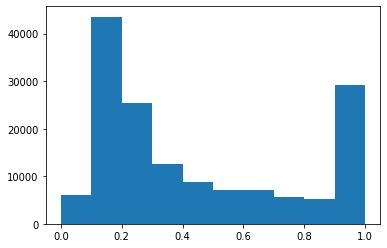

In [132]:
plt.hist(batch_imgs[0, :].ravel());

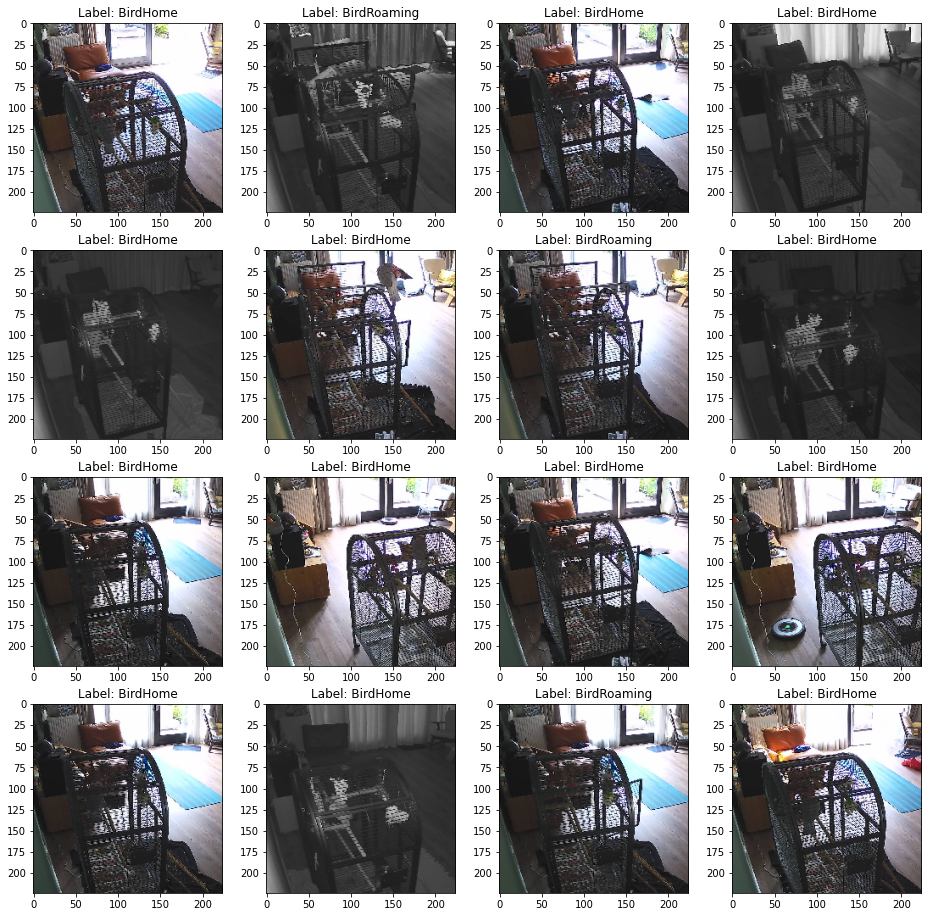

In [133]:
_, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for idx, ax in zip(range(16), axes.ravel()):
#     idx = 4
    ax.imshow(batch_imgs[idx, :])
    ax.set_title(f"Label: {class_ind[batch_labels[idx]]}")
    

Ok, sometimes it's very hard, even for me, to see the bird on on this resolution. Well, let's see what the model does.

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=3399 // BATCH_SIZE,
        epochs=75,
        validation_data=val_generator,
        validation_steps=1133 // BATCH_SIZE
)
# model.save_weights('weights-0.h5')

Epoch 1/75
105/106 [============================>.] - ETA: 2s - loss: 0.5259 - acc: 0.7613

/home/jvlier/venv-aviar/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


106/106 [==============================] - 290s 3s/step - loss: 0.5245 - acc: 0.7624 - val_loss: 0.4132 - val_acc: 0.8054
Epoch 2/75
106/106 [==============================] - 289s 3s/step - loss: 0.3674 - acc: 0.8355 - val_loss: 0.3365 - val_acc: 0.8518
Epoch 3/75
106/106 [==============================] - 291s 3s/step - loss: 0.2277 - acc: 0.9154 - val_loss: 0.1931 - val_acc: 0.9250
Epoch 4/75
106/106 [==============================] - 290s 3s/step - loss: 0.1785 - acc: 0.9290 - val_loss: 0.2327 - val_acc: 0.9098
Epoch 5/75
106/106 [==============================] - 289s 3s/step - loss: 0.1396 - acc: 0.9480 - val_loss: 0.1337 - val_acc: 0.9455
Epoch 6/75
106/106 [==============================] - 289s 3s/step - loss: 0.1061 - acc: 0.9596 - val_loss: 0.1523 - val_acc: 0.9455
Epoch 7/75
106/106 [==============================] - 290s 3s/step - loss: 0.0880 - acc: 0.9694 - val_loss: 0.1104 - val_acc: 0.9616
Epoch 8/75
106/106 [==============================] - 291s 3s/step - loss: 0.056

In [139]:
model.save_weights('weights.h5')